# Importing The Tools 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

# Importing The Data and take a tour in the data 

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
store_data = pd.read_csv("store.csv")

/home/omar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("Shape of Train data :", train_data.shape)
print("Shape of Test data :", test_data.shape)
print("Shape of Store data :", store_data.shape)

Shape of Train data : (1017209, 9)
Shape of Test data : (41088, 8)
Shape of Store data : (1115, 10)


In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
store_data.isnull().sum().sort_values(ascending = False)

PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
CompetitionDistance            3
Promo2                         0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64

In [11]:
train_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [12]:
train_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [13]:
train_data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [14]:
train_data['Open'].unique()

array([1, 0])

In [15]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
train_data['Promo'].unique()

array([1, 0])

In [17]:
train_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [18]:
print(sum(train_data["Open"] == 0))
print(sum(train_data["Open"] == 1))

172817
844392


In [19]:
print(sum(test_data["Open"] == 0))
print(sum(test_data["Open"] == 1))

5984
35093


In [20]:
print(sum(train_data["StateHoliday"] == 'a'))
print(sum(train_data["StateHoliday"] == 'b'))
print(sum(train_data["StateHoliday"] == 'c'))
print(sum(train_data["StateHoliday"] == 0))

20260
6690
4100
131072


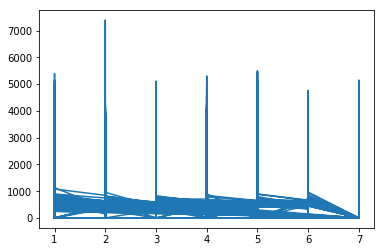

In [21]:
plt.plot(train_data['DayOfWeek'],train_data['Customers'])

In [22]:
train_data[['Sales','Customers','Promo','SchoolHoliday']].corr(method='pearson')

,Sales,Customers,Promo,SchoolHoliday
Sales,1.000000,0.894711,0.452345,0.085124
Customers,0.894711,1.000000,0.316169,0.071568
Promo,0.452345,0.316169,1.000000,0.067483
SchoolHoliday,0.085124,0.071568,0.067483,1.000000


In [23]:
train_data['Mon'] = train_data["Date"].apply(lambda x : int(x[5:7]))
train_data['Yr'] = train_data["Date"].apply(lambda x : int(x[:4]))
train_data["HolidayBin"] = train_data.StateHoliday.map({"0": 0, "a": 1, "b": 1, "c": 1})

In [24]:
test_data['Mon'] = test_data["Date"].apply(lambda x : int(x[5:7]))
test_data['Yr'] = test_data["Date"].apply(lambda x : int(x[:4]))
test_data["HolidayBin"] = test_data.StateHoliday.map({"0": 0, "a": 1, "b": 1, "c": 1})

# Drop Some Data

In [25]:
train_data = train_data.drop(['Customers', 'Store','Date','StateHoliday'],axis= 1 )
test_data = test_data.drop(['Date','StateHoliday','Store'],axis= 1 )

In [26]:
train_data.head()

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin
0,5,5263,1,1,1,7,2015,0.0
1,5,6064,1,1,1,7,2015,0.0
2,5,8314,1,1,1,7,2015,0.0
3,5,13995,1,1,1,7,2015,0.0
4,5,4822,1,1,1,7,2015,0.0


In [27]:
test_data.head()

,Id,DayOfWeek,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin
0,1,4,1.0,1,0,9,2015,0
1,2,4,1.0,1,0,9,2015,0
2,3,4,1.0,1,0,9,2015,0
3,4,4,1.0,1,0,9,2015,0
4,5,4,1.0,1,0,9,2015,0


# Missing Values Cleaning 

In [28]:
test_data = test_data.fillna(0)
test_data.isnull().sum()

Id               0
DayOfWeek        0
Open             0
Promo            0
SchoolHoliday    0
Mon              0
Yr               0
HolidayBin       0
dtype: int64

# Categorcal Data

# Feature Scaling 

# Machine Learning Model